In [1]:
import pandas as pd
df = pd.read_csv('dataset/spotify-2023.csv', sep=',', decimal=',')
df.head()

track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts      streams  in_apple_playlists  ...  bpm  key   mode  \
0                147  141381703.0                  43  ...  125    B  Major   
1                 48  133716286.0                  48  ...   92   C#  Major   
2                113  140003974.0                  94  ...  138    F  Major   
3                100  800840817.0                 116  ...  170    A  Major   
4                 50  303236322.0                  84  ...  144    A  Minor   

   danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
0              80         89       83             31                   0   
1              71         61       74              7                   0   
2              51         32       53             17                   0   
3              55         58       72             11                   0   
4              65         23       80             14                  63   

   liveness_%  speechiness_%  
0           8              4  
1          10              4  
2          31              6  
3          11             15  
4          11              6  

[5 rows x 24 columns]

/home/kevin/PycharmProjects/linear-regression/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


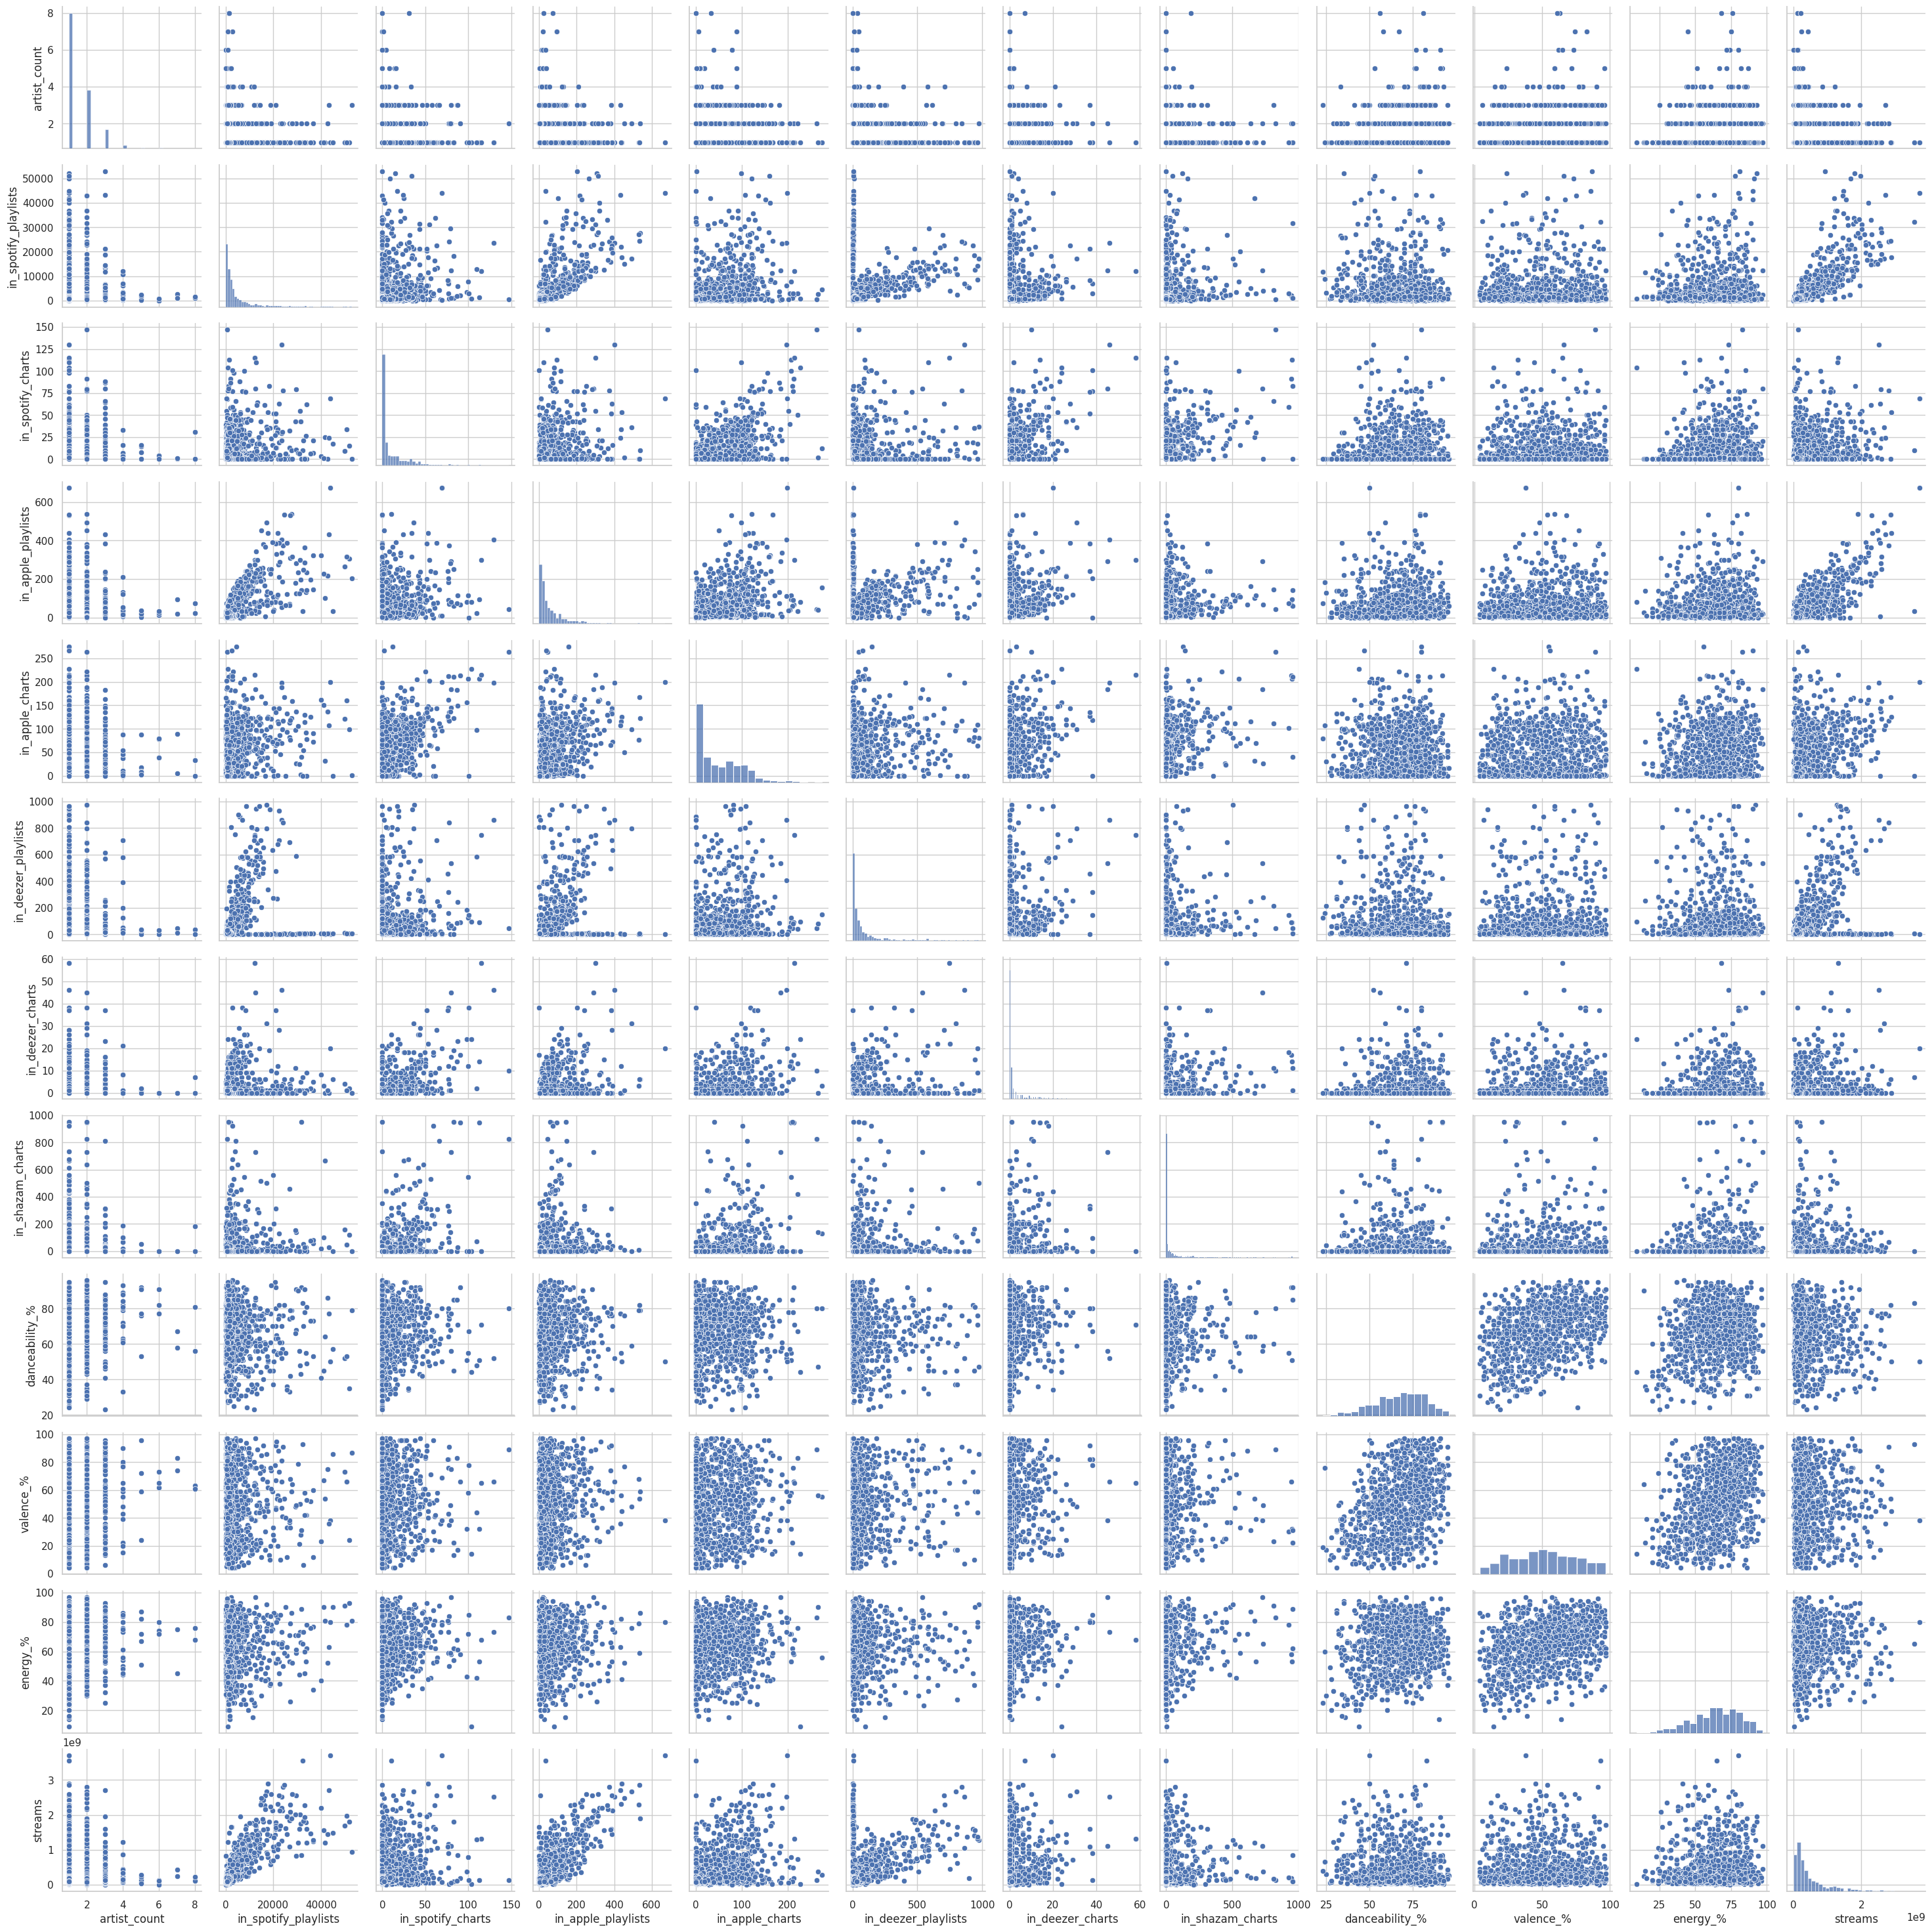

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid', context='notebook')
cols = ['artist_count','in_spotify_playlists','in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'danceability_%', 'valence_%', 'energy_%','streams']
sns.pairplot(df[cols], height=2.5)
plt.show()

In [22]:
import numpy as np
temp_df = df[cols]
print(temp_df)
change_type = ["in_shazam_charts", "streams"]
for i in range(len(temp_df["streams"])):
    if temp_df["streams"][i] == "BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3":
        temp_df["streams"][i] = None
for e in change_type:
    #temp_df[e] = temp_df[e].str.replace(",", ".").astype(float)
    temp_df[e] = temp_df[e].astype('float64')
for e in cols:
    print(e, " ", temp_df[e].dtype)
    

     artist_count  in_spotify_playlists  in_spotify_charts  \
0               2                   553                147   
1               1                  1474                 48   
2               1                  1397                113   
3               1                  7858                100   
4               1                  3133                 50   
..            ...                   ...                ...   
948             1                   953                  0   
949             1                  1180                  0   
950             2                   573                  0   
951             3                  1320                  0   
952             1                   782                  2   

     in_apple_playlists  in_apple_charts  in_deezer_playlists  \
0                    43              263                 45.0   
1                    48              126                 58.0   
2                    94              207                 91.

/tmp/ipykernel_5405/3584471566.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df[e] = temp_df[e].astype('float64')
/tmp/ipykernel_5405/3584471566.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df[e] = temp_df[e].astype('float64')


<Axes: >

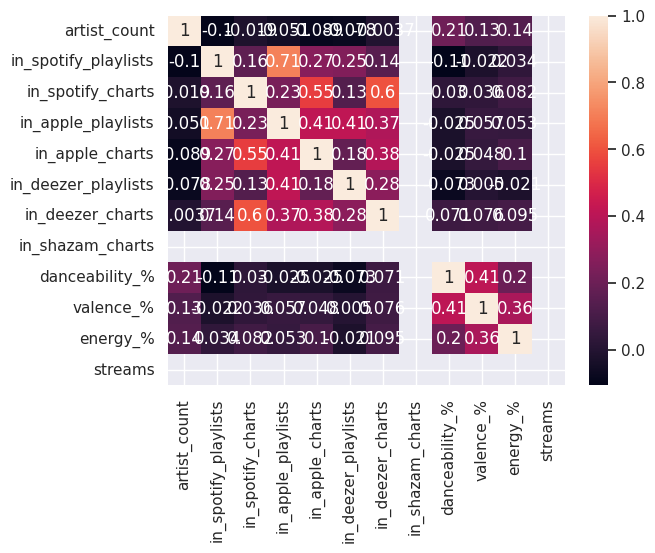

In [15]:
cm = np.corrcoef(temp_df.values.T)
#plt.imshow(cm)
sns.set(font_scale = 1)
sns.heatmap(cm, cbar=True, annot=True,yticklabels=cols, xticklabels=cols)

In [26]:
temp_df.head()

artist_count  in_spotify_playlists  in_spotify_charts  in_apple_playlists  \
0             2                   553                147                  43   
1             1                  1474                 48                  48   
2             1                  1397                113                  94   
3             1                  7858                100                 116   
4             1                  3133                 50                  84   

   in_apple_charts  in_deezer_playlists  in_deezer_charts  in_shazam_charts  \
0              263                 45.0                10             826.0   
1              126                 58.0                14             382.0   
2              207                 91.0                14             949.0   
3              207                125.0                12             548.0   
4              133                 87.0                15             425.0   

   danceability_%  valence_%  energy_%      streams  
0              80         89        83  141381703.0  
1              71         61        74  133716286.0  
2              51         32        53  140003974.0  
3              55         58        72  800840817.0  
4              65         23        80  303236322.0

In [30]:
for e in cols:
    print("data de", e,"max", temp_df[e].max(), "min", temp_df[e].min(), "mean", temp_df[e].mean())

data de artist_count max 8 min 1 mean 1.5561385099685205
data de in_spotify_playlists max 52898 min 31 mean 5200.124868835257
data de in_spotify_charts max 147 min 0 mean 12.009443861490032
data de in_apple_playlists max 672 min 0 mean 67.8121720881427
data de in_apple_charts max 275 min 0 mean 51.9087093389297
data de in_deezer_playlists max 974.0 min 0.0 mean 100.92777649527807
data de in_deezer_charts max 58 min 0 mean 2.666316894018888
data de in_shazam_charts max 953.0 min 0.0 mean 50.78883942414175
data de danceability_% max 96 min 23 mean 66.96956977964324
data de valence_% max 97 min 4 mean 51.43126967471144
data de energy_% max 97 min 9 mean 64.2791185729276
data de streams max 3703895074.0 min 2762.0 mean 514137424.93907565


In [31]:
for i in range(len(temp_df["streams"])):
    temp_df["streams"][i] /= 10000

/tmp/ipykernel_5405/1667271611.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df["streams"][i] /= 10000
/tmp/ipykernel_5405/1667271611.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df["streams"][i] /= 10000
/tmp/ipykernel_5405/1667271611.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df["streams"][i] /= 10000
/tmp/ipykernel_5405/1667271611.py:2: SettingWithCopyWarning: 
A value is trying to be set on a co

In [32]:
temp_df.head()

artist_count  in_spotify_playlists  in_spotify_charts  in_apple_playlists  \
0             2                   553                147                  43   
1             1                  1474                 48                  48   
2             1                  1397                113                  94   
3             1                  7858                100                 116   
4             1                  3133                 50                  84   

   in_apple_charts  in_deezer_playlists  in_deezer_charts  in_shazam_charts  \
0              263                 45.0                10             826.0   
1              126                 58.0                14             382.0   
2              207                 91.0                14             949.0   
3              207                125.0                12             548.0   
4              133                 87.0                15             425.0   

   danceability_%  valence_%  energy_%     streams  
0              80         89        83  14138.1703  
1              71         61        74  13371.6286  
2              51         32        53  14000.3974  
3              55         58        72  80084.0817  
4              65         23        80  30323.6322

In [60]:
# reemplazo los valores nulos por el promedio para no afectar las correlaciones
shazam_mean = temp_df["in_shazam_charts"].mean()
temp_df["in_shazam_charts"].fillna(shazam_mean, inplace=True)

/tmp/ipykernel_5405/422457371.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df["in_shazam_charts"].fillna(shazam_mean, inplace=True)


/home/kevin/PycharmProjects/linear-regression/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


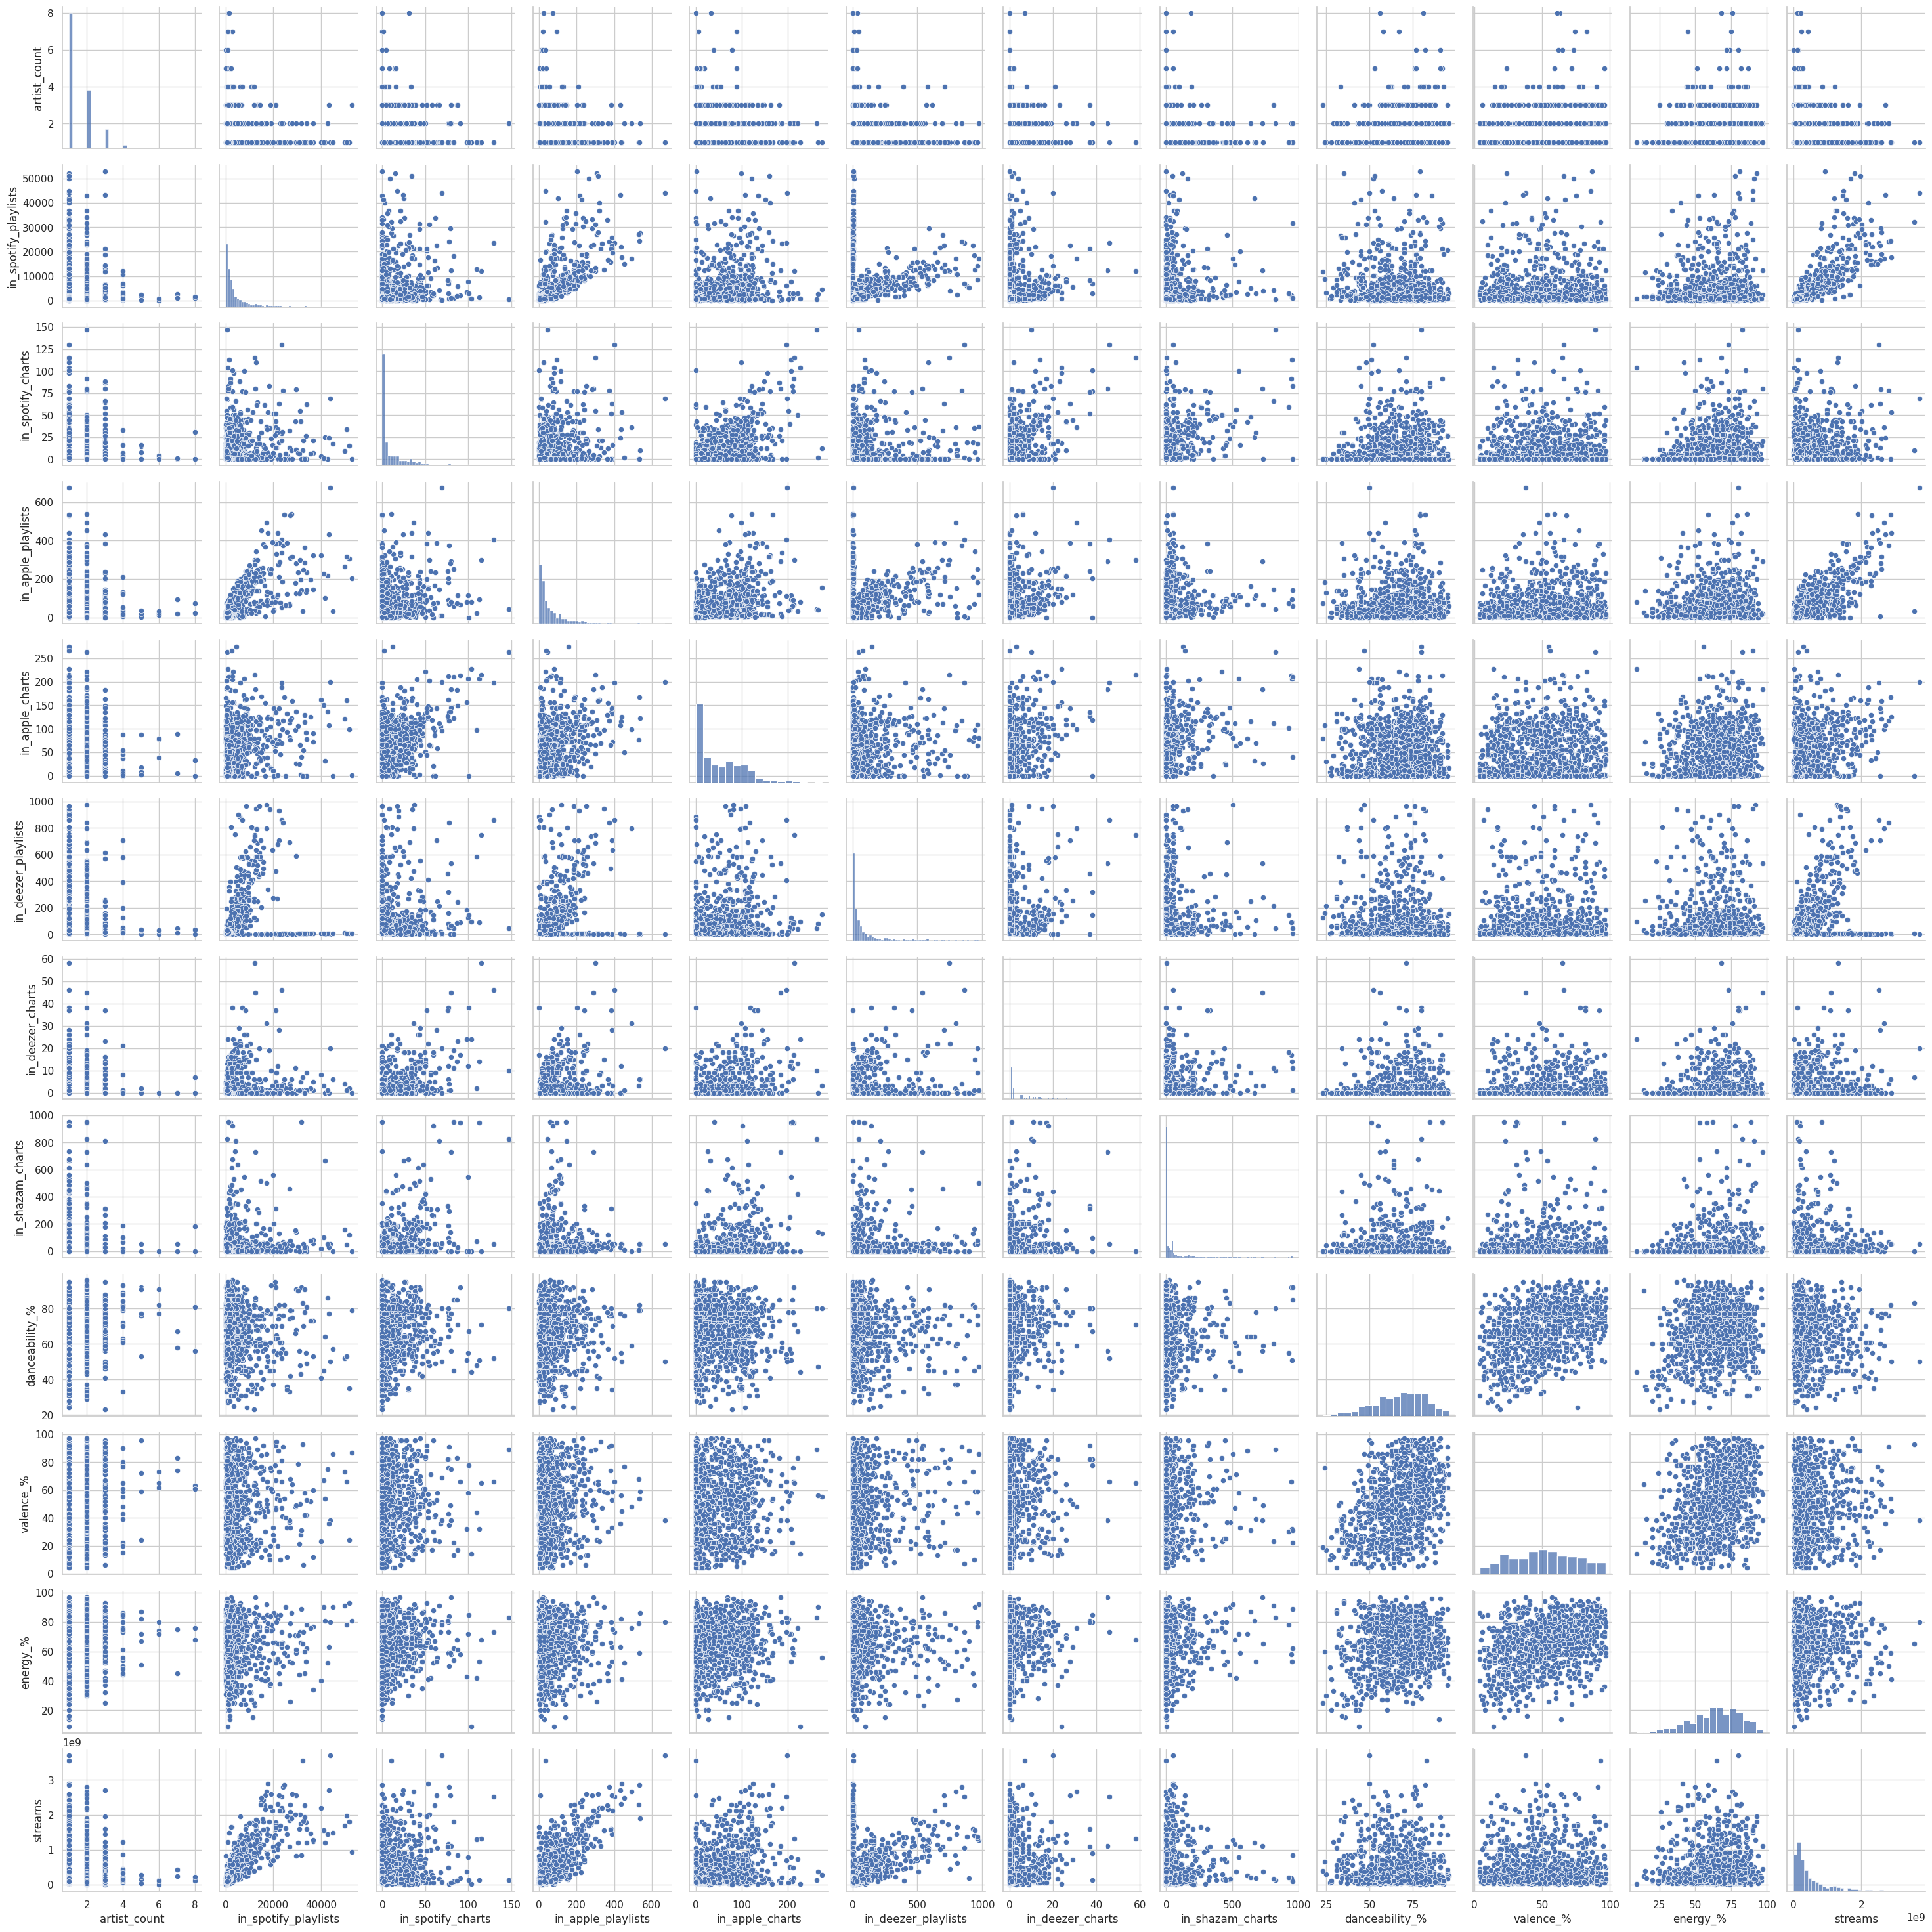

In [61]:
sns.set(style='whitegrid', context='notebook')
cols = ['artist_count','in_spotify_playlists','in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'danceability_%', 'valence_%', 'energy_%','streams']
sns.pairplot(df[cols], height=2.5)
plt.savefig('modelado.png')
plt.show()

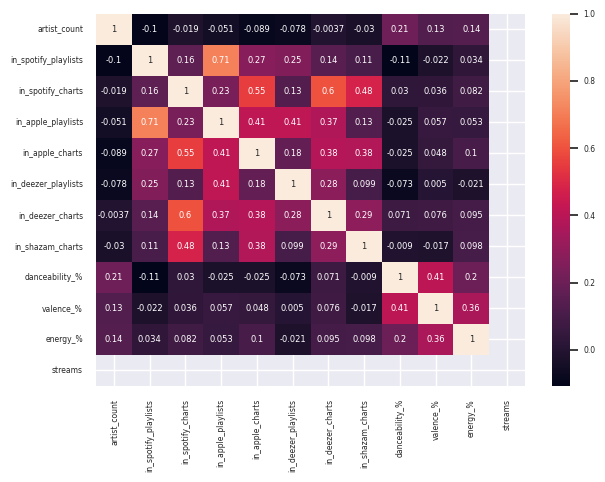

In [62]:
cm = np.corrcoef(temp_df.values.T)
sns.set(font_scale = 0.5)
sns.heatmap(cm, cbar=True, annot=True,yticklabels=cols, xticklabels=cols)
plt.tight_layout()
plt.savefig('correlaciones.png')
plt.show()